# Kaggle - Spotify data analysis

## Introduction

For the purposes of this project we are using the dataset [“🎹 Spotify Tracks Dataset”](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset) from Kaggle. This dataset consists of a large list of songs from the popular streaming platform Spotify, along with 20 parameters describing each track. Our **goals** are to:

1. Build a model to predict danceability based on the song’s other parameters.

2. Find the most and least popular genres based on averages.

3. Find the parameters which affect the track’s popularity the most.

Our project could be of use to music producers to help make their next song a success (in terms of popularity). It could also be helpful for music platforms like Spotify to generate better personalized playlists. Additionally the process of analyzing this data would develop our own data mining skills and help us consolidate what we have learned so far.


**2. Goal - Find the most and least popular genres based on averages.**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loeme andmed sisse ja eemaldame korduvad väärtused.
Eemaldame projekti kontekstis ebavajalikud atribuudid.

In [34]:
data = pd.read_csv("dataset.csv")

data = data.drop_duplicates(subset = ["track_id"])

data = data.drop(data.columns[[0]], axis=1)
data = data.drop(['artists', 'track_id', 'track_name', 'album_name'], axis=1)



Finding the mean popularity value for each genre.

In [35]:
most_popular_genres_data = data[['popularity', 'track_genre']]

#most_popular_genres_data = pd.get_dummies(most_popular_genres_data, columns=['track_genre'])

average_popularity = {}
popularity_sum = {}
genre_count = {}

#Finding sum of popularity score and count of each genre.
for ind in most_popular_genres_data.index:
    genre = most_popular_genres_data['track_genre'][ind]
    popularity = most_popular_genres_data['popularity'][ind]
    
    if genre not in popularity_sum.keys():
        popularity_sum[genre] = popularity
        genre_count[genre] = 1
    else:
        popularity_sum[genre]+=popularity
        genre_count[genre]+=1

#Finding the average popularity of each genre.
for key in popularity_sum.keys():
    average_popularity[key] = popularity_sum[key]/genre_count[key]
        


Plotting 10 genres with the highest average popularity values.

<Figure size 900x400 with 0 Axes>

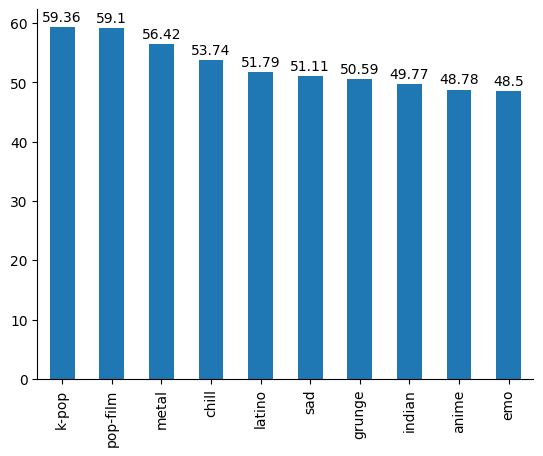

In [36]:
from operator import itemgetter

fig = plt.figure(figsize=(9, 4))

top_10_highest = dict(sorted(average_popularity.items(), key = itemgetter(1), reverse=True)[:10])

highest_10 = pd.DataFrame.from_dict(top_10_highest, orient="index")


ax = highest_10.plot(kind="bar")
plt.xticks(range(len(top_10_highest)), list(top_10_highest.keys()))

# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.get_legend().remove()

i = 0
for key in top_10_highest.keys():
    plt.text(i, top_10_highest[key] + 1, round(top_10_highest[key], 2), ha = 'center')
    i+=1

plt.show()

In our dataset about Spotify tracks the highest average popularity among 144 different genres is k-pop with popularity of 59.36, closely followed by pop-film (59.1). The 3rd highest popularity in our dataset belongs to the metal genre with average popularity of 56.42. The chill genre is in 4th place with average popularity of 53.74. 5th spot belongs to latino genre and has average popularity of 51.79, 6th place is held by “sad” with popularity of 51.11, 7th place belongs to “grunge” genre and has average popularity of 50.59. “Indian” music genre has the 8th place in our Spotify track dataset with average popularity of 49.77, followed by “anime” music genre that has the 9th place in our dataset with an average popularity of 48.78. Top 10 most popular track genres among our data is ended by “emo” music genre which has an average popularity of 48.5.


Plotting 10 genres with the lowest average popularity values.

<Figure size 1200x300 with 0 Axes>

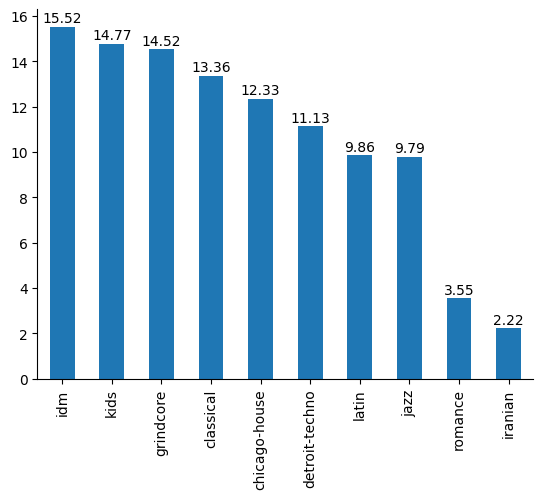

In [37]:
top_10_lowest = dict(sorted(average_popularity.items(), key = itemgetter(1), reverse=False)[:10])
fig = plt.figure(figsize=(12, 3))

top_10_lowest = dict(sorted(top_10_lowest.items(), key = itemgetter(1), reverse=True)[:10])

lowest_10 = pd.DataFrame.from_dict(top_10_lowest, orient="index")

ax = lowest_10.plot(kind="bar")
plt.xticks(range(len(top_10_lowest)), list(top_10_lowest.keys()))

# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.get_legend().remove()

plt.xticks(range(len(top_10_lowest)), list(top_10_lowest.keys()), rotation='vertical')

i = 0
for key in top_10_lowest.keys():
    plt.text(i, top_10_lowest[key]+0.2, round(top_10_lowest[key], 2), ha = 'center')
    i+=1
    
plt.show()

3. Goal: Find the parameters which affect the track’s popularity the most.


Overall:

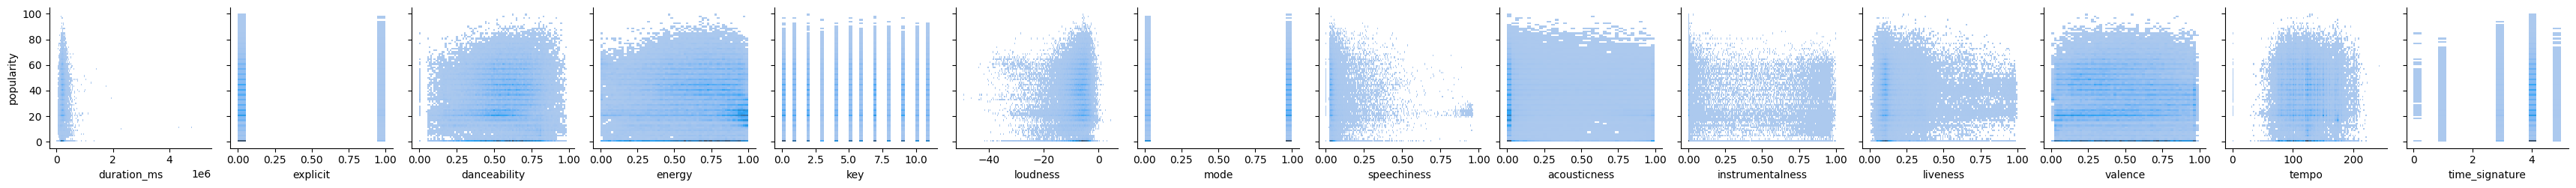

In [38]:
import seaborn as sns

sns.pairplot(data, x_vars = ["duration_ms", "explicit", "danceability",
                            "energy", "key", "loudness", "mode", "speechiness", 
                             "acousticness", "instrumentalness", "liveness", 
                             "valence", "tempo", "time_signature"], 
             y_vars = ["popularity"], kind='hist')
plt.show()


In [39]:
correlations = data.corr()['popularity']

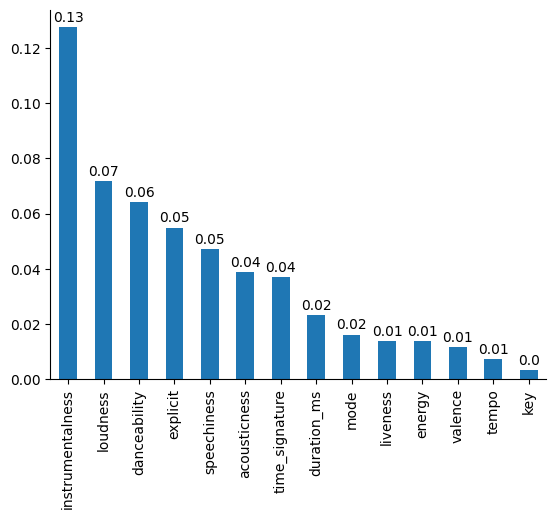

In [40]:
correlations = correlations.abs()
correlations = correlations.drop(['popularity'], axis=0)
correlations = correlations.sort_values(ascending = False)
ax = correlations.plot(kind='bar')

# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

i = 0
for key in correlations.keys():
    plt.text(i, correlations[key]+0.002, round(correlations[key], 2), ha = 'center')
    i+=1

plt.show()


Finding which parameters affect the popularity of k-pop the most.

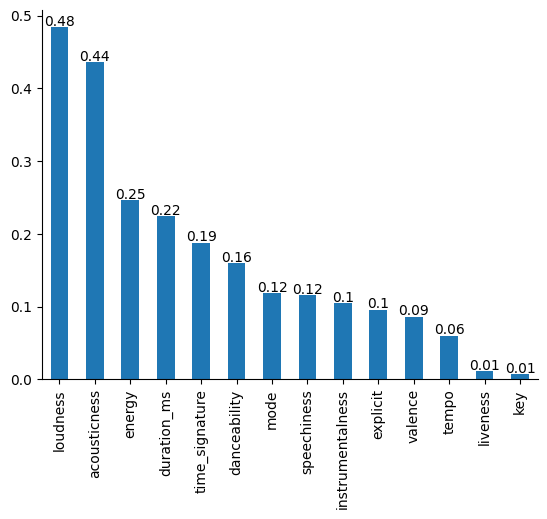

In [41]:
def correlations(dataset):
    correlations = dataset.corr()['popularity']

    correlations = correlations.abs()
    correlations = correlations.drop(['popularity'], axis=0)
    correlations = correlations.sort_values(ascending = False)
    ax = correlations.plot(kind='bar')

    # Hide the right and top spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    i = 0
    for key in correlations.keys():
        plt.text(i, correlations[key]+0.002, round(correlations[key], 2), ha = 'center')
        i+=1

    plt.show()

kpop_data = data.query("track_genre == 'k-pop'")

correlations(kpop_data)

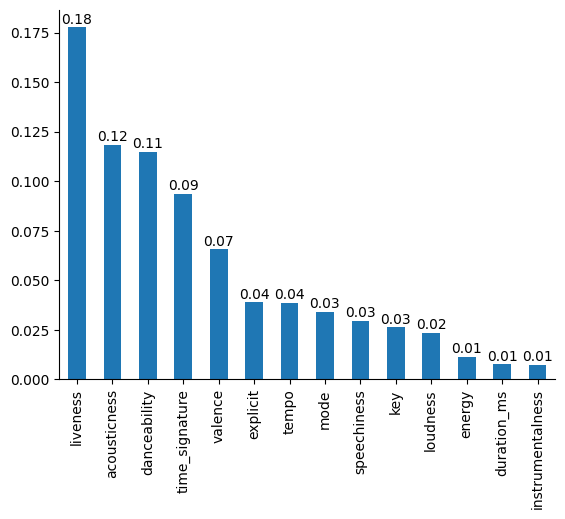

In [42]:
popfilm_data = data.query("track_genre == 'pop-film'")

correlations(popfilm_data)

**1. Goal - Build a model to predict danceability based on the song’s other parameters**

One-Hot Encoding:

In [43]:
data["explicit"] = (data["explicit"] == True).astype(int)
data["explicit"].value_counts()



data_oh = pd.get_dummies(data, columns=['track_genre', 'key', 'time_signature'])

In [44]:
data

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,22,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,22,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,41,283893,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


Separating the training data and the test data.

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_oh.drop("danceability", axis = 1), data["danceability"], train_size = 0.75, random_state = 1)


In [46]:
#Some inspiration was gathered from HW7.
# using all potentially relevant parameters:

from sklearn.linear_model import LinearRegression, Ridge, Lasso

def MSE(y_target, y_pred):
    return sum([(target - pred)**2 for target, pred in zip(y_target, y_pred)]) / len(y_target)


linear = LinearRegression().fit(X_train, y_train)
ridge = Ridge().fit(X_train, y_train)
lasso = Lasso().fit(X_train, y_train)

linear_predicted = linear.predict(X_test)
ridge_predicted = ridge.predict(X_test)
lasso_predicted = lasso.predict(X_test)

linear_MSE = MSE(y_test, linear_predicted)
ridge_MSE = MSE(y_test, ridge_predicted)
lasso_MSE = MSE(y_test, lasso_predicted)

print("Linear regression MSE:", linear_MSE)
print("Ridge regression MSE:", ridge_MSE)
print("Lasso regression MSE:", lasso_MSE)

Linear regression MSE: 0.013210771887453752
Ridge regression MSE: 0.013210629718975029
Lasso regression MSE: 0.03117726353557437


In [13]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 10, random_state = 1).fit(X_train, y_train)




In [14]:
rgr_predicted = model.predict(X_test)

rgr_MSE = MSE(y_test, rgr_predicted)

print("Random forest regression MSE:", rgr_MSE)

Random forest regression MSE: 0.010965834455170229


Trying the Random Forest Regression method without "popularity" as a parameter

In [15]:
#Without popularity

X_train, X_test, y_train, y_test = train_test_split(data_oh.drop(["danceability", "popularity"], axis = 1), data["danceability"], train_size = 0.75, random_state = 1)

In [16]:
#RandomForestRegressor
model = RandomForestRegressor(n_estimators = 10, random_state = 1).fit(X_train, y_train)

rgr_predicted = model.predict(X_test)

rgr_MSE = MSE(y_test, rgr_predicted)

print("Random forest regression MSE (without popularity):", rgr_MSE)


Random forest regression MSE (without popularity): 0.010921046490248935


Finding which parameters affect danceability the most

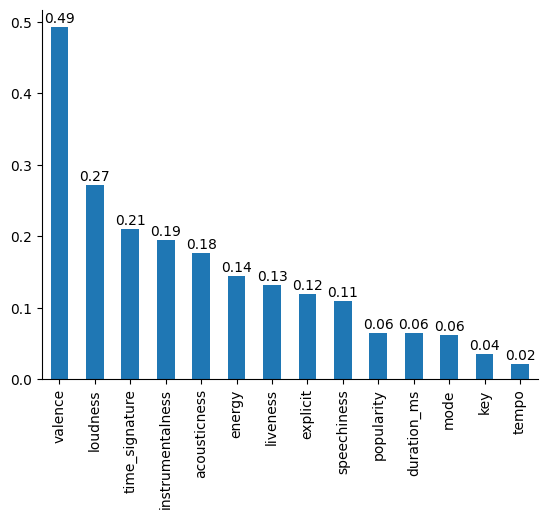

In [17]:
correlations = data.corr()['danceability']

correlations = correlations.abs()
correlations = correlations.drop(['danceability'], axis=0)
correlations = correlations.sort_values(ascending = False)

ax = correlations.plot(kind='bar')

# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

i = 0
for key in correlations.keys():
    plt.text(i, correlations[key]+0.006, round(correlations[key], 2), ha = 'center')
    i+=1

In [18]:
def random_forest_mse(n_parameters):
    parameters = []
    
    all_parameters = sorted(correlations.items(), key = itemgetter(1), reverse=True)
    
    for i in range(n_parameters):
        parameters.append(all_parameters[i][0])
    
    parameters.append('danceability')
    
    #print(parameters)
    
    data_rf = data[parameters]

    X_train, X_test, y_train, y_test = train_test_split(data_rf.drop(["danceability"], axis = 1), data_rf["danceability"], train_size = 0.75, random_state = 1)

    #RandomForestRegressor
    model = RandomForestRegressor(n_estimators = 1, random_state = 1).fit(X_train, y_train)

    rgr_predicted = model.predict(X_test)

    rgr_MSE = MSE(y_test, rgr_predicted)

    #print("Random forest regression MSE (without popularity):", rgr_MSE)
    return rgr_MSE
    
errors = {}
    
for i in range(1,len(correlations)+1):
    errors[i] = random_forest_mse(i)




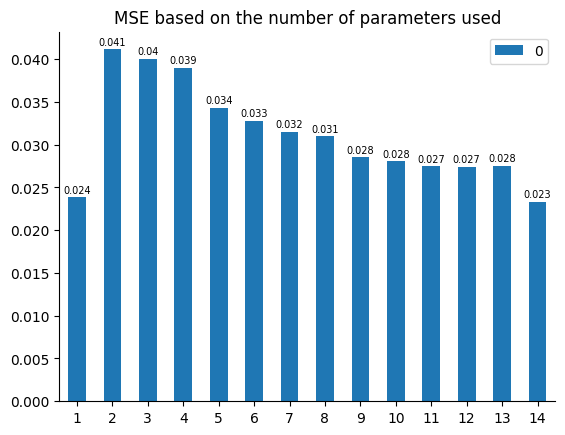

In [19]:
df = pd.DataFrame.from_dict(errors, orient="index")

ax = df.plot(kind='bar')

# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.xticks(rotation='horizontal')


i = 0
for i in range(1,len(errors)+1):
    plt.text(i-1, errors[i]+0.0005, round(errors[i], 3), ha = 'center', size='7')
    i+=1

plt.title("MSE based on the number of parameters used")    

plt.show()